# **😎 IMPORT THE DEPENDENCIES AND LOAD THE DATASET**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
newsData = pd.read_csv('/content/News.csv')

In [3]:
newsData.sample(5)

,Unnamed: 0,title,text,subject,date,class
24694,1192,U.S. judge questions government on Trump's lat...,"GREENBELT, Md. (Reuters) - A U.S. judge on Mon...",politicsNews,"October 16, 2017",1
26026,2524,U.S. energy secretary duped into fake intervie...,WASHINGTON (Reuters) - U.S. Energy Secretary R...,politicsNews,"July 26, 2017",1
17539,17539,WATCH: SEAN HANNITY Offers To Step In After He...,What a brave boy and what a sad world we live ...,left-news,"Dec 10, 2017",0
37206,13704,Irish independent ministers say political situ...,DUBLIN (Reuters) - The two independent cabinet...,worldnews,"November 28, 2017",1
38049,14547,Russia: Lebanon should solve problems without ...,"MOSCOW (Reuters) - Russia s foreign minister, ...",worldnews,"November 17, 2017",1


In [4]:
newsData.columns

Index(['Unnamed: 0', 'title', 'text', 'subject', 'date', 'class'], dtype='object')

In [5]:
newsData.shape

(44919, 6)

In [6]:
newsData = newsData.drop(columns=['Unnamed: 0','title','subject','date'])

In [7]:
newsData.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [8]:
newsData.columns

Index(['text', 'class'], dtype='object')

In [9]:
newsData.isnull().sum()

,0
text,0
class,0


# **😉 PREPROCESSING**

In [30]:
from tqdm import tqdm
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
def preprocessText(text):
  preprocessedText = []
  stop_words = set(stopwords.words("english"))

  for sentence in tqdm(text):
    sentence = re.sub(r'[^\w\s]', '', sentence)
    preprocessedText.append(" ".join(token.lower() for token in str(sentence).split() if token not in stop_words))

  return preprocessedText

In [25]:
cleanedNewsData = preprocessText(newsData['text'].values)

100%|██████████| 44919/44919 [00:05<00:00, 8744.02it/s] 


In [28]:
newsData['text'] = cleanedNewsData

In [29]:
newsData['text'].loc[4]

'pope francis used annual christmas day message rebuke donald trump without even mentioning name pope delivered message days members united nations condemned trump move recognize jerusalem capital israel pontiff prayed monday peaceful coexistence two states within mutually agreed internationally recognized borders see jesus children middle east continue suffer growing tensions israelis palestinians francis said festive day let us ask lord peace jerusalem holy land let us pray resume dialogue may prevail parties negotiated solution finally reached pope went plead acceptance refugees forced homes issue trump continues fight francis used jesus place inn analogy today winds war blowing world outdated model development continues produce human societal environmental decline christmas invites us focus sign child recognize faces little children especially like jesus place inn said jesus knows well pain welcomed hard place lay one head added may hearts closed homes bethlehem pope said mary jose

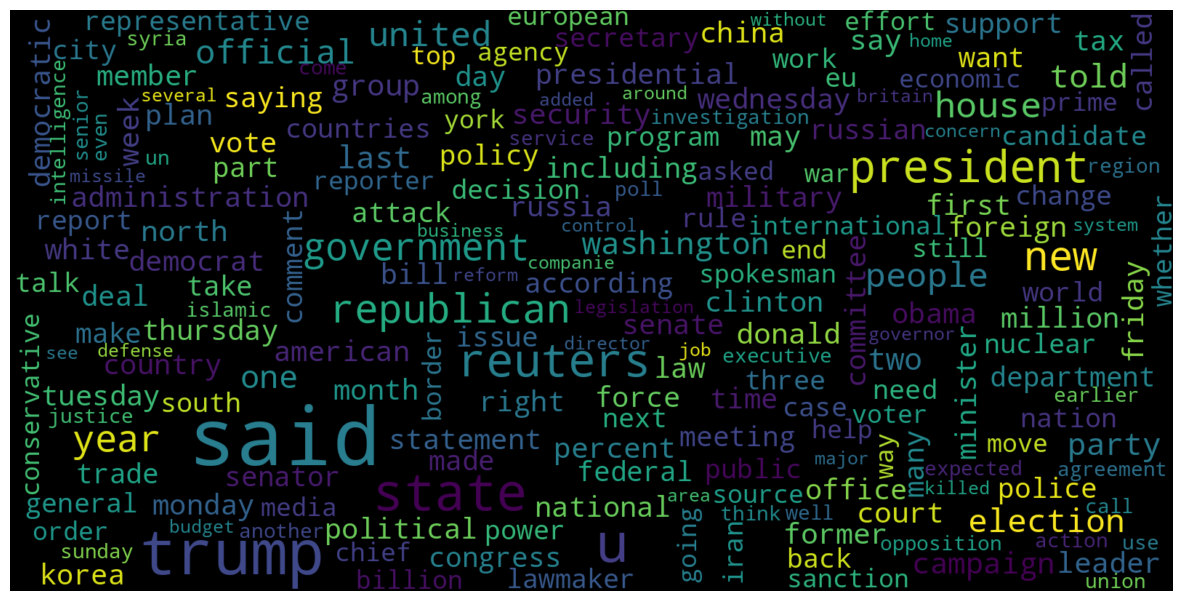

In [32]:
# Real
consolidated = ' '.join(
    word for word in newsData['text'][newsData['class'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

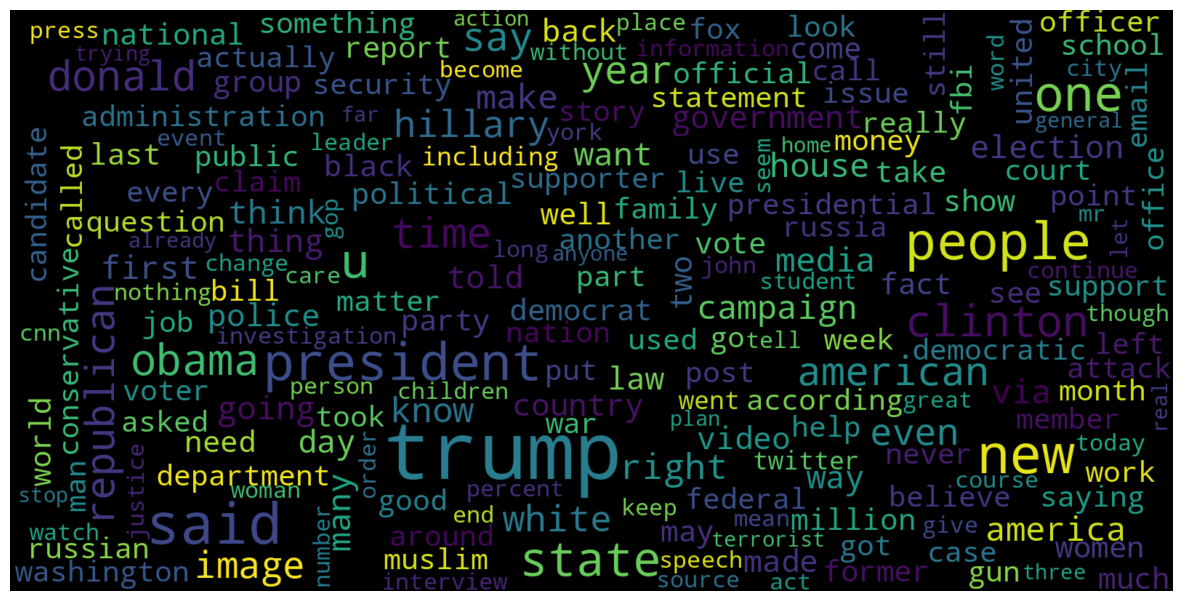

In [33]:
# Fake
consolidated = ' '.join(
    word for word in newsData['text'][newsData['class'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

# **😁 TRAIN TEST SPLIT**

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = newsData['text']
Y = newsData['class']

In [38]:
X_train , X_test , Y_train, Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [40]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(35935,) (8984,) (35935,) (8984,)


# **😌VECTORIZATION**

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# **🥰 LOGISTIC REGRESSION**

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [59]:
LR = LogisticRegression()
LR.fit(X_train,Y_train)
predictionLR = LR.predict(X_test)

print(f"Logistic Regression Accuracy: {accuracy_score(predictionLR, Y_test)}")

Logistic Regression Accuracy: 0.9899821905609973


# **😍 DECISION TREES**

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
DT = DecisionTreeClassifier()
DT.fit(X_train,Y_train)
predictionDT = DT.predict(X_test)

print(f"Decision Tree Accuracy: {accuracy_score(predictionDT, Y_test)}")

Decision Tree Accuracy: 0.9972172751558326


# **😘 RANDOM FOREST**

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
RF = RandomForestClassifier()
RF.fit(X_train,Y_train)
predictionRF = RF.predict(X_test)

print(f"Random Forest Accuracy: {accuracy_score(predictionRF, Y_test)}")

Random Forest Accuracy: 0.9972172751558326


# **😙 SUPPORT VECTOR MACHINE**

In [69]:
from sklearn.svm import SVC

In [ ]:
SVM = SVC()
SVM.fit(X_train,Y_train)
predictionSVM = SVM.predict(X_test)

print(f"SVM Accuracy: {accuracy_score(predictionSVM, Y_test)}")